In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Location1.csv')
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
df['temperature_2m'] = round((df['temperature_2m'] - 32) * 5/9,2)
df['dewpoint_2m'] = round((df['dewpoint_2m'] - 32) * 5/9,2)
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793


In [50]:
# 일간
df_day = df.copy()
df_day['Time'] = df_day['Time'].str[:10]
#월간
df_month = df.copy()
df_month['Time'] = df_month['Time'].str[:7]
#연간
df_year = df.copy()
df_year['Time'] = df_year['Time'].str[:4]

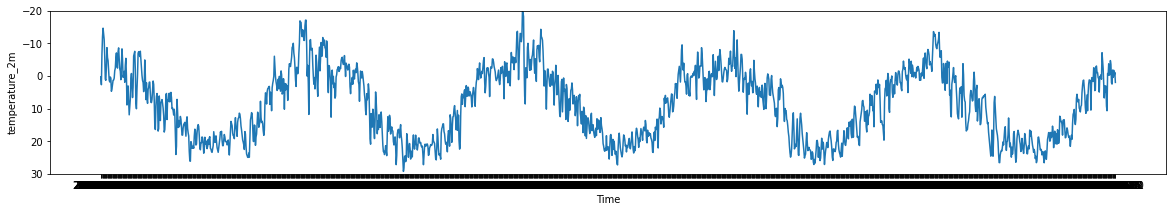

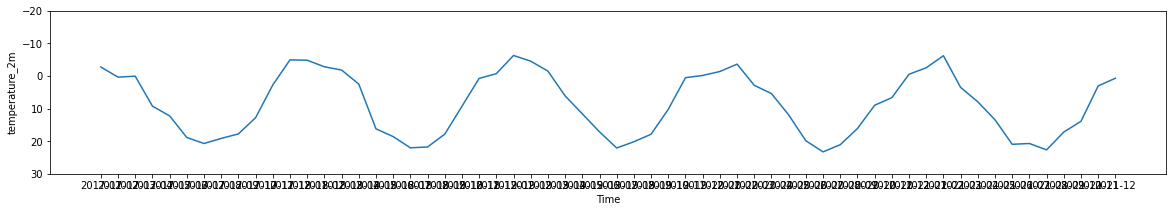

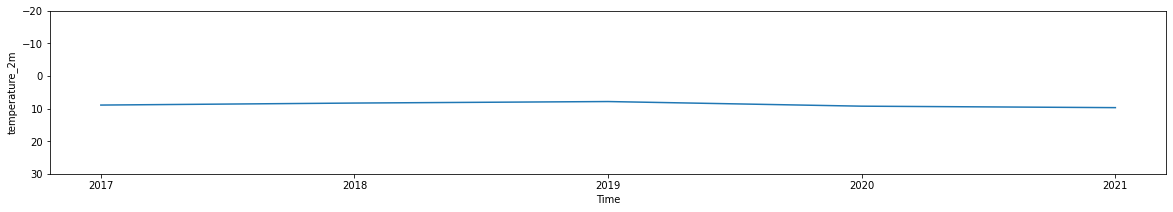

In [45]:
df_dmy = [df_day,df_month,df_year]
for i in df_dmy:
    plt.gcf().set_size_inches(20,3)
    plt.ylim(30,-20)
    sns.lineplot(data = i.groupby('Time')['temperature_2m'].agg('mean').reset_index(),x ='Time',y = 'temperature_2m')
    plt.show()
    
    #i.groupby('Time')['temperature_2m'].agg('mean').plot()

In [50]:
#상관분석(기상조건)
df[['temperature_2m','relativehumidity_2m','Power']].corr()

,temperature_2m,relativehumidity_2m,Power
temperature_2m,1.000000,-0.137995,-0.20710
relativehumidity_2m,-0.137995,1.000000,-0.07036
Power,-0.207100,-0.070360,1.00000


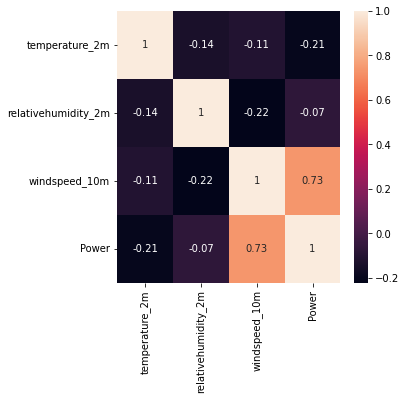

In [48]:
sns.heatmap(df[['temperature_2m','relativehumidity_2m','Power']].corr(),annot = True,fmt = '.2g')
plt.gcf().set_size_inches(5,5)

In [51]:
#풍속 및 풍향분석
df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m' ,'Power']].corr()

,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
windspeed_10m,1.000000,0.932981,0.170281,0.182164,0.936677,0.732801
windspeed_100m,0.932981,1.000000,0.160404,0.176354,0.819065,0.778704
winddirection_10m,0.170281,0.160404,1.000000,0.898239,0.163340,0.157623
winddirection_100m,0.182164,0.176354,0.898239,1.000000,0.173228,0.171619
windgusts_10m,0.936677,0.819065,0.163340,0.173228,1.000000,0.662677
Power,0.732801,0.778704,0.157623,0.171619,0.662677,1.000000


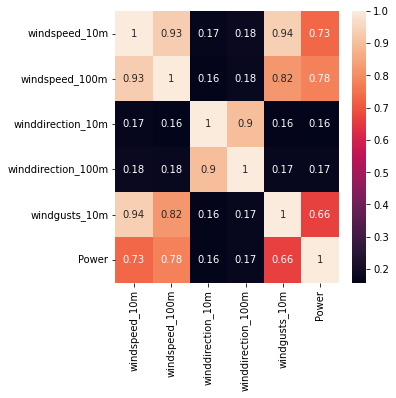

In [52]:
sns.heatmap(df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m','Power']].corr(),annot = True,fmt = '.2g')
plt.gcf().set_size_inches(5,5)

In [6]:
df_month = df.copy()
df_month['Time'] = df_month['Time'].str[:7]
#df_day['Time'] = pd.to_datetime(df_day['Time'])
df_month.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,2017-01,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,2017-01,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,2017-01,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,2017-01,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793


In [56]:
df_day_m

,Time,temperature_2m,Power
0,2017-01-02,0.264167,0.194150
1,2017-01-03,2.688750,0.230358
2,2017-01-04,-6.678750,0.868033
3,2017-01-05,-11.977083,0.698042
4,2017-01-06,-14.650417,0.322771
...,...,...,...
1820,2021-12-27,0.454167,0.654875
1821,2021-12-28,-1.749167,0.469037
1822,2021-12-29,-0.117083,0.201963
1823,2021-12-30,-1.073750,0.132725


<Axes: xlabel='Time'>

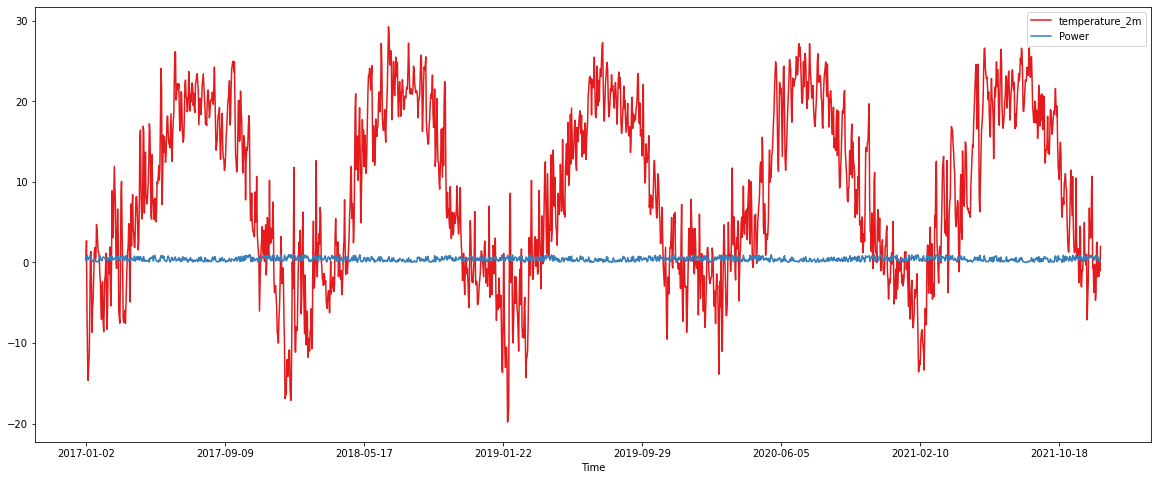

In [54]:
# 온도와 발전량 비교
df_day_m = df_day.groupby('Time')[['temperature_2m','Power']].agg('mean').reset_index()
ax = df_day_m.plot(x = 'Time',y = 'temperature_2m',figsize = (20,8),color = '#e41a1c')
df_day_m.plot(x = 'Time', y  ='Power',ax = ax,color = '#377eb8')

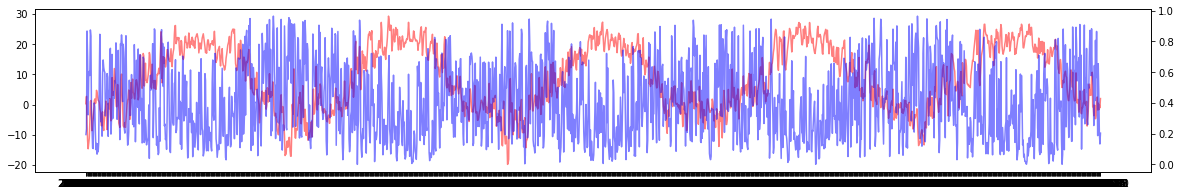

In [64]:
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
ax1.plot( df_day_m['Time'], df_day_m['temperature_2m'], color = 'red', alpha = 0.5)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot( df_day_m['Time'], df_day_m['Power'], color = 'blue', alpha = 0.5)
plt.gcf().set_size_inches(20,3)
plt.show()

In [78]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 데이터 불러오기
# 여기에서는 데이터프레임을 df로 가정하고, 실제 데이터프레임에 맞게 수정하세요.
# 'Time', 'temperature_2m', 'relativehumidity_2m', 'windspeed_10m', 'Power' 등의 컬럼이 존재한다고 가정합니다.
# 필요에 따라 datetime 형식의 'Time' 컬럼을 숫자로 변환하는 등의 전처리가 필요할 수 있습니다.
# 예를 들어, df['Time'] = pd.to_numeric(pd.to_datetime(df['Time']))

# feature와 target 변수 선택
features = ['Time','temperature_2m', 'relativehumidity_2m', 'windspeed_10m']
target = 'Power'

X = df_day[features]
y = df_day[target]

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 머신러닝 모델 정의
model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 평가 지표 출력 (예시로 평균 제곱 오차 사용)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.021623447472507242


In [47]:
df_day['Time'] = pd.to_numeric(pd.to_datetime(df_day['Time']))

In [79]:
df_pred = pd.DataFrame({'y_test': y_test,'pred':y_pred})
df_pred

,y_test,pred
28101,0.2914,0.244798
25482,0.0854,0.103908
19891,0.3951,0.411381
43029,0.0917,0.230932
40286,0.0007,0.054452
...,...,...
36067,0.3432,0.357451
43757,0.0632,0.175895
21611,0.1110,0.362215
21928,0.0949,0.151413


In [88]:
df_wp = df[['Time','windspeed_10m','windspeed_100m','Power']]
df_wp.head()

,Time,windspeed_10m,windspeed_100m,Power
0,2017-01-02 00:00:00,1.44,1.26,0.1635
1,2017-01-02 01:00:00,2.06,3.99,0.1424
2,2017-01-02 02:00:00,1.30,2.78,0.1214
3,2017-01-02 03:00:00,1.30,2.69,0.1003
4,2017-01-02 04:00:00,2.47,4.43,0.0793


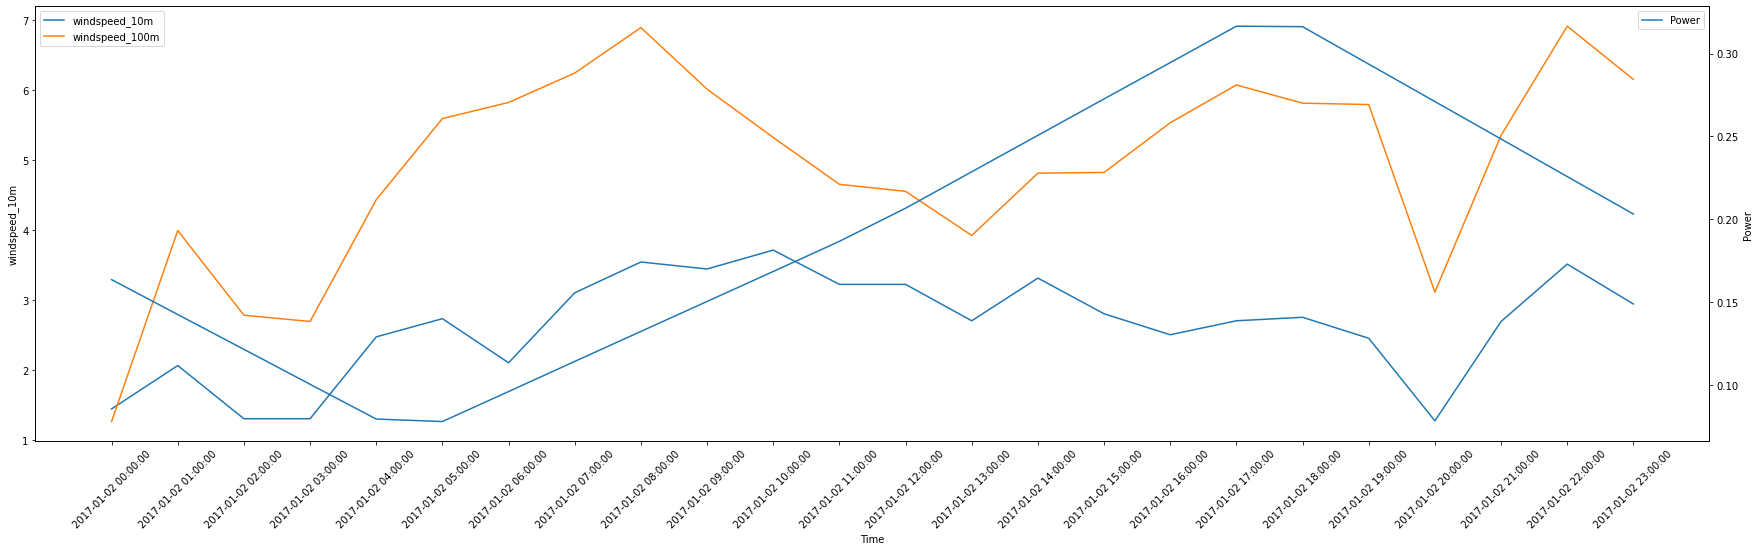

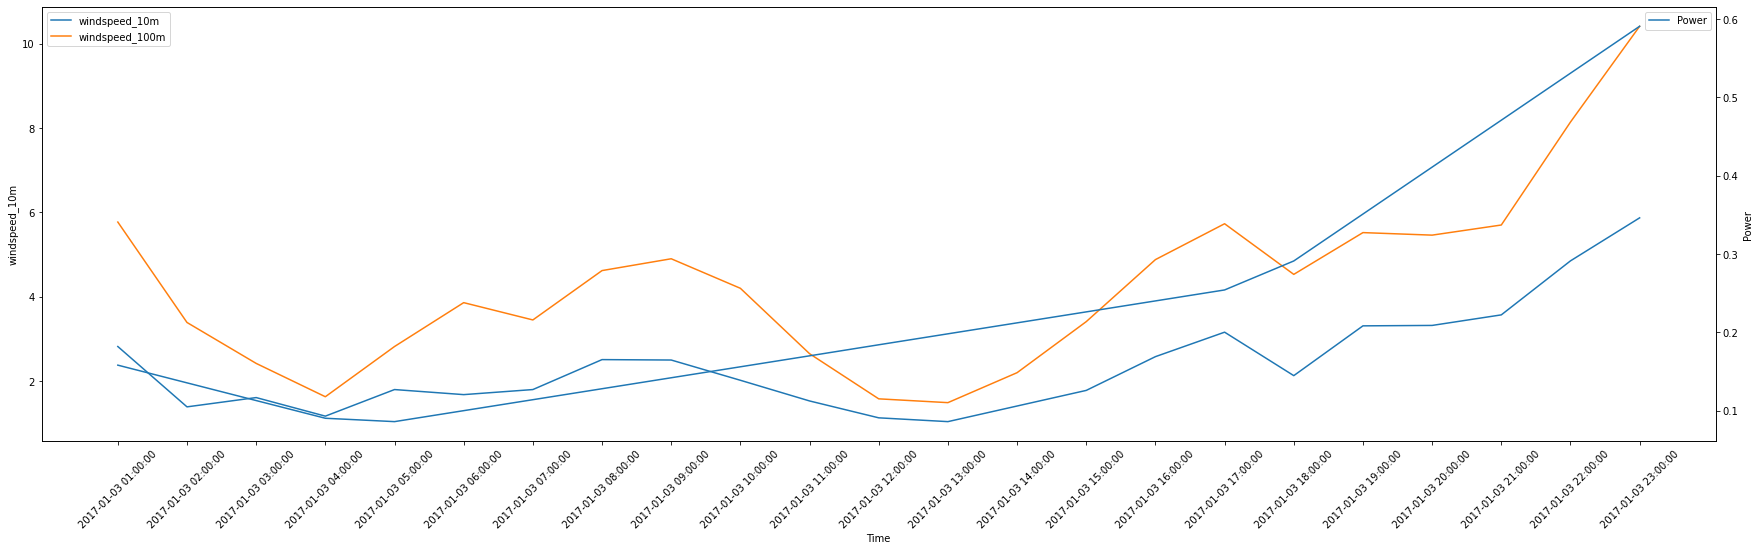

In [112]:
plt.figure(figsize=(30, 8))
ax1 = sns.lineplot(x='Time', y='windspeed_10m', data=df_wp[:24], label='windspeed_10m')
ax2 = sns.lineplot(x='Time', y='windspeed_100m', data=df_wp[:24], label='windspeed_100m')
plt.xticks(rotation=45)
ax3 = ax1.twinx()
sns.lineplot(x='Time', y='Power', data=df_wp[:24],ax=ax3, label='Power')
plt.legend()
plt.show()
#plt.gcf().set_size_inches(30,8)
#sns.lineplot(x='Time', y='Series3', data=df, label='Series3')

plt.figure(figsize=(30, 8))
ax1 = sns.lineplot(x='Time', y='windspeed_10m', data=df_wp[25:48], label='windspeed_10m')
ax2 = sns.lineplot(x='Time', y='windspeed_100m', data=df_wp[25:48], label='windspeed_100m')
plt.xticks(rotation=45)
ax3 = ax1.twinx()
sns.lineplot(x='Time', y='Power', data=df_wp[25:48],ax=ax3, label='Power')
plt.legend()
plt.show()

In [17]:
df.columns

TypeError: 'Index' object is not callable

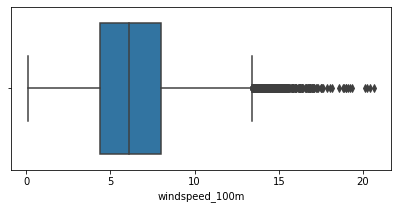

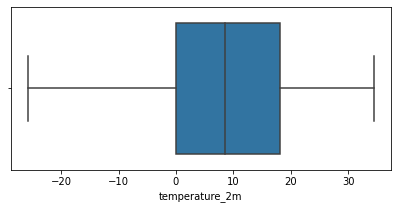

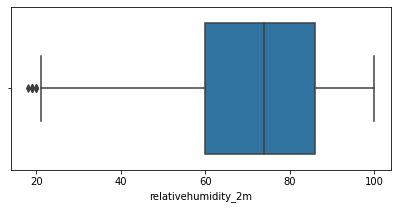

In [33]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
ax = sns.boxplot(df_day['windspeed_100m'])

plt.figure(figsize=(15,3))
plt.subplot(1,2,2)
ax = sns.boxplot(df_day['temperature_2m'])
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
ax = sns.boxplot(df_day['relativehumidity_2m'])

In [63]:
df_day.drop('Time',axis=1)


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793
...,...,...,...,...,...,...,...,...,...
43795,1.17,94,0.28,1.00,1.91,53,137,2.5,0.1796
43796,1.56,94,0.78,2.52,4.30,56,72,4.8,0.2066
43797,1.17,95,0.56,1.10,1.84,360,45,4.3,0.2336
43798,1.33,96,0.83,2.40,4.62,45,51,4.2,0.2606


In [53]:
df_day.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793


TypeError: Vertical orientation requires numeric `y` variable.

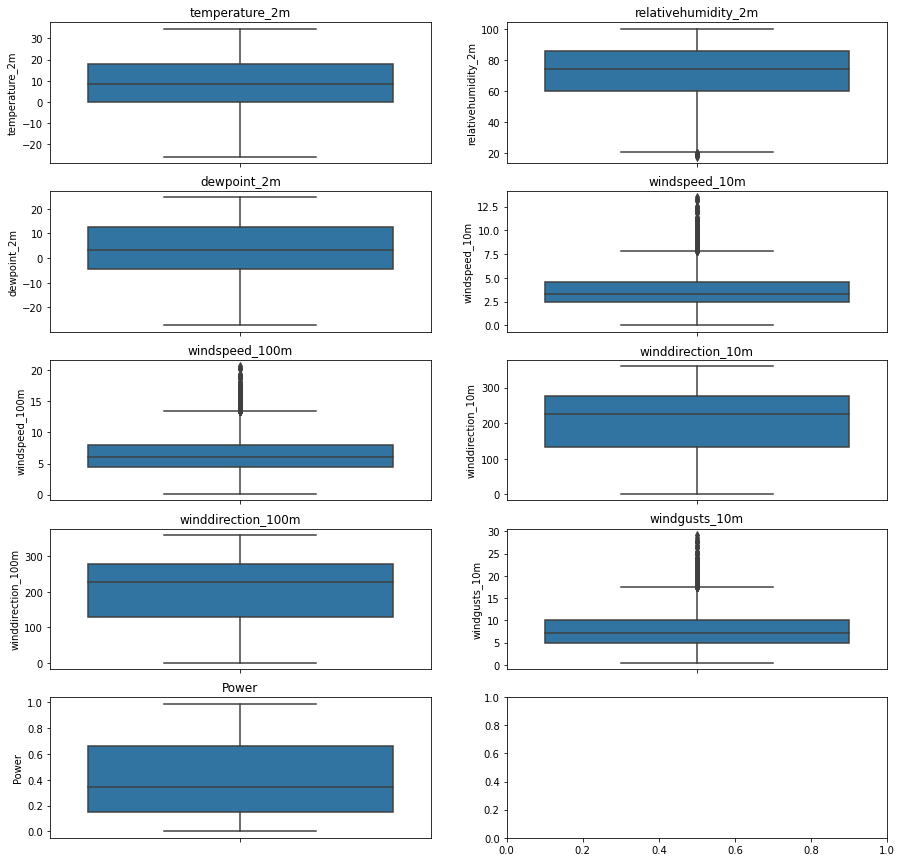

In [107]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(df_day.drop('Time',axis=1).columns):
    sns.boxplot(y=df_day.drop('Time',axis=1)[column], ax=axes[i])  # Use y instead of x
    axes[i].set_title(column)
plt.tight_layout()
plt.show()


<Axes: xlabel='windspeed_10m', ylabel='Density'>

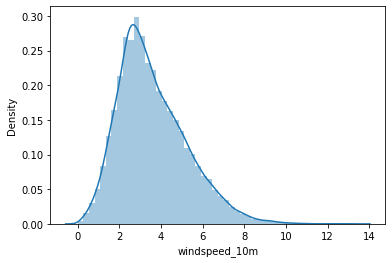

In [80]:
sns.distplot(df_day['windspeed_10m'])

In [81]:
import numpy as np

In [85]:
df_day['10m_wind'] = np.where(df_day['windspeed_10m']<=2,'low',
                              np.where(df_day['windspeed_10m'] <=4,'mid',
                              np.where(df_day['windspeed_10m'],'high','none')))
df_day['10m_wind'].head()


0    low
1    mid
2    low
3    low
4    mid
Name: 10m_wind, dtype: object

In [96]:
df_day[df_day['10m_wind'] =='low'].groupby('Time')['Power'].agg('mean').reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1086 non-null   object 
 1   Power   1086 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.1+ KB


In [ ]:
df

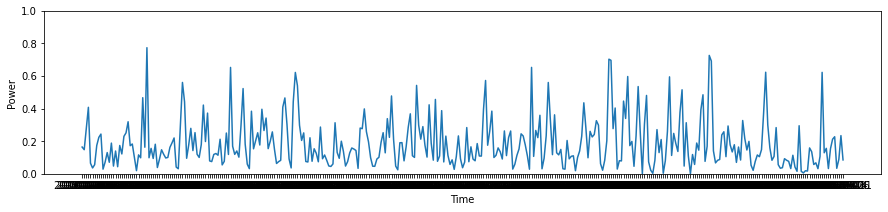

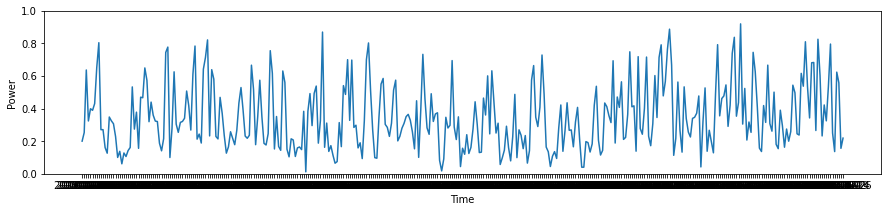

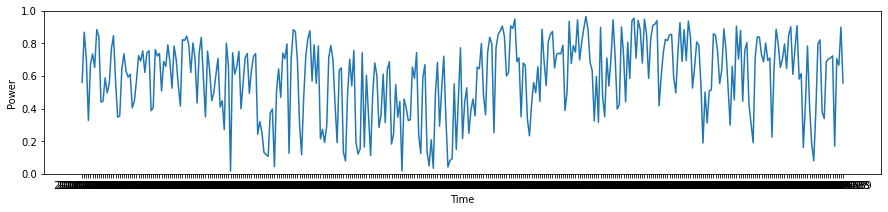

In [116]:
plt.figure(figsize = (15,3))
sns.lineplot(data = df_day[df_day['10m_wind'] =='low'].groupby('Time')['Power'].agg('mean').reset_index()[:365],x = 'Time',y='Power')
plt.ylim(0,1)
plt.show()
plt.figure(figsize = (15,3))
sns.lineplot(data = df_day[df_day['10m_wind'] =='mid'].groupby('Time')['Power'].agg('mean').reset_index()[:365],x = 'Time',y='Power')
plt.ylim(0,1)
plt.show()
plt.figure(figsize = (15,3))
sns.lineplot(data = df_day[df_day['10m_wind'] =='high'].groupby('Time')['Power'].agg('mean').reset_index()[:365],x = 'Time',y='Power')
plt.ylim(0,1)
plt.show()

In [123]:
df_day.head(365)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,10m_wind,Moving_power
0,2017-01-02,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635,low,NaN
1,2017-01-02,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424,mid,NaN
2,2017-01-02,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214,low,NaN
3,2017-01-02,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003,low,NaN
4,2017-01-02,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793,mid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-01-17,-0.33,93,-1.33,3.26,6.50,117,127,6.0,0.5812,mid,0.33350
361,2017-01-17,-0.22,93,-1.28,4.20,8.08,115,121,8.0,0.6409,high,0.38147
362,2017-01-17,-0.11,92,-1.22,4.30,8.18,126,129,8.5,0.7006,high,0.43415
363,2017-01-17,0.06,92,-1.06,4.56,8.61,116,121,8.9,0.7604,high,0.49154


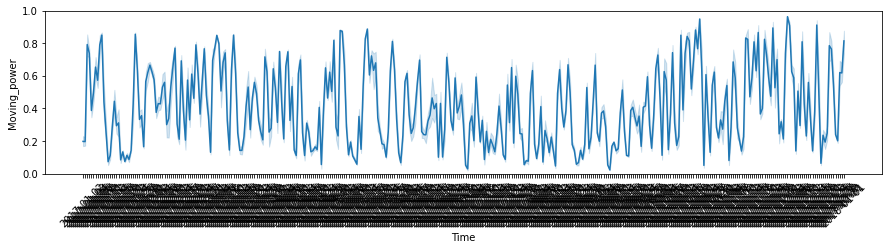

In [127]:
plt.figure(figsize =(15,3))
sns.lineplot(data = df_day[:8760], x= 'Time',y = 'Moving_power')
plt.ylim(0,1)
plt.xticks(rotation = 45)
plt.show()

In [53]:
df_day.groupby('Time')[['temperature_2m','Power']].agg('mean').reset_index()

,Time,temperature_2m,Power
0,2017-01-02,0.264167,0.194150
1,2017-01-03,2.688750,0.230358
2,2017-01-04,-6.678750,0.868033
3,2017-01-05,-11.977083,0.698042
4,2017-01-06,-14.650417,0.322771
...,...,...,...
1820,2021-12-27,0.454167,0.654875
1821,2021-12-28,-1.749167,0.469037
1822,2021-12-29,-0.117083,0.201963
1823,2021-12-30,-1.073750,0.132725


<Axes: xlabel='Time'>

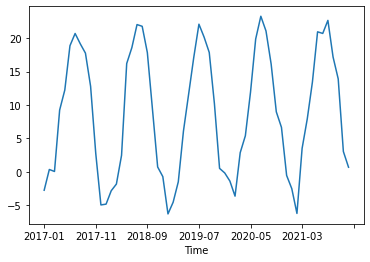

In [33]:
df_month.groupby('Time')['temperature_2m'].agg('mean').plot()

In [7]:
df_year = df.copy()
df_year['Time'] = df_year['Time'].str[:4]
#df_day['Time'] = pd.to_datetime(df_day['Time'])
df_year.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,2017,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,2017,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,2017,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,2017,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793


In [37]:
df_year.groupby('Time')['temperature_2m'].agg('mean')

Time
2017    8.927033
2018    8.309840
2019    7.847030
2020    9.265962
2021    9.715018
Name: temperature_2m, dtype: float64

<Axes: xlabel='Time'>

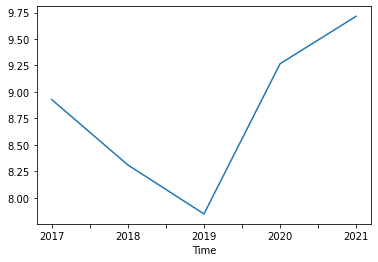

In [38]:
df_year.groupby('Time')['temperature_2m'].agg('mean').plot()

In [39]:
df.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power'],
      dtype='object')

In [40]:
df[['temperature_2m','relativehumidity_2m','windspeed_10m','Power']].corr()

,temperature_2m,relativehumidity_2m,windspeed_10m,Power
temperature_2m,1.000000,-0.137995,-0.112035,-0.207100
relativehumidity_2m,-0.137995,1.000000,-0.221810,-0.070360
windspeed_10m,-0.112035,-0.221810,1.000000,0.732801
Power,-0.207100,-0.070360,0.732801,1.000000


<Axes: >

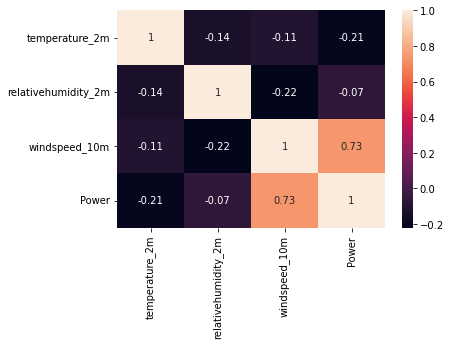

In [43]:
sns.heatmap(df[['temperature_2m','relativehumidity_2m','windspeed_10m','Power']].corr(),annot = True,fmt = '.2g')

In [46]:
df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m','Power']].corr()

,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
windspeed_10m,1.000000,0.932981,0.170281,0.182164,0.936677,0.732801
windspeed_100m,0.932981,1.000000,0.160404,0.176354,0.819065,0.778704
winddirection_10m,0.170281,0.160404,1.000000,0.898239,0.163340,0.157623
winddirection_100m,0.182164,0.176354,0.898239,1.000000,0.173228,0.171619
windgusts_10m,0.936677,0.819065,0.163340,0.173228,1.000000,0.662677
Power,0.732801,0.778704,0.157623,0.171619,0.662677,1.000000


In [52]:
pd.DataFrame(df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m','Power']].corr().unstack().sort_values(ascending = False).drop_duplicates())

0
windspeed_10m      windspeed_10m       1.000000
                   windgusts_10m       0.936677
windspeed_100m     windspeed_10m       0.932981
winddirection_100m winddirection_10m   0.898239
windspeed_100m     windgusts_10m       0.819065
Power              windspeed_100m      0.778704
                   windspeed_10m       0.732801
                   windgusts_10m       0.662677
windspeed_10m      winddirection_100m  0.182164
winddirection_100m windspeed_100m      0.176354
                   windgusts_10m       0.173228
                   Power               0.171619
windspeed_10m      winddirection_10m   0.170281
winddirection_10m  windgusts_10m       0.163340
                   windspeed_100m      0.160404
                   Power               0.157623

<Axes: >

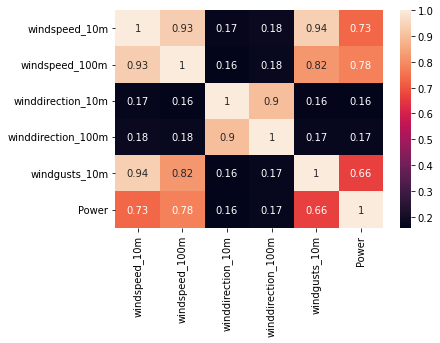

In [49]:
sns.heatmap(df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m','Power']].corr(),annot = True,fmt = '.2g')

In [98]:
ts = df_day[['Time','temperature_2m','Power']]
ts.head()

,Time,temperature_2m,Power
0,2017-01-02,-1.94,0.1635
1,2017-01-02,-2.00,0.1424
2,2017-01-02,-2.89,0.1214
3,2017-01-02,-2.56,0.1003
4,2017-01-02,-2.61,0.0793


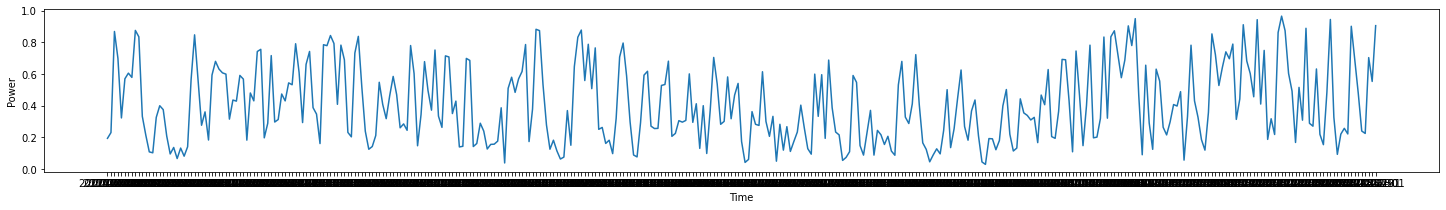

In [103]:
sns.lineplot(data = tss[:365],x = tss[:365].index,y = 'Power')
plt.gcf().set_size_inches(25,3)

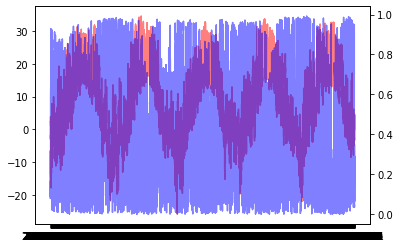

In [61]:
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
ax1.plot(df_day['Time'], df_day['temperature_2m'], color = 'red', alpha = 0.5)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(df_day['Time'], df_day['Power'], color = 'blue', alpha = 0.5)
plt.show()

In [99]:
tss = ts.groupby('Time')[['temperature_2m','Power']].agg('mean')
tss.head()

,temperature_2m,Power
Time,,
2017-01-02,0.264167,0.194150
2017-01-03,2.688750,0.230358
2017-01-04,-6.678750,0.868033
2017-01-05,-11.977083,0.698042
2017-01-06,-14.650417,0.322771


In [102]:
tss.shape

(1825, 2)

In [91]:
df_day.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793


In [39]:
df_ml = df_day[['temperature_2m', 'relativehumidity_2m', 'windspeed_10m','Power']]
df_ml.head()

,temperature_2m,relativehumidity_2m,windspeed_10m,Power
0,-1.94,85,1.44,0.1635
1,-2.00,86,2.06,0.1424
2,-2.89,91,1.30,0.1214
3,-2.56,88,1.30,0.1003
4,-2.61,88,2.47,0.0793


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [95]:
x = df_ml.drop('Power',axis = 1)
y = df_ml['Power']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30660, 3)
(30660,)
(13140, 3)
(13140,)


In [9]:
df_ml.head()

,temperature_2m,relativehumidity_2m,windspeed_10m,Power
0,-1.94,85,1.44,0.1635
1,-2.00,86,2.06,0.1424
2,-2.89,91,1.30,0.1214
3,-2.56,88,1.30,0.1003
4,-2.61,88,2.47,0.0793


In [11]:
df_ml.columns

Index(['temperature_2m', 'relativehumidity_2m', 'windspeed_10m', 'Power'], dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
features = df_ml[['temperature_2m', 'relativehumidity_2m', 'windspeed_10m', 'Power']]
features_stand = scaler.fit_transform(features)
features_stand

array([[-0.99497365,  0.75428344, -1.30427901, -0.83894911],
       [-1.00052535,  0.81362324, -0.92836185, -0.91213189],
       [-1.08287569,  1.11032227, -1.38916353, -0.98496784],
       ...,
       [-0.70721011,  1.34768149, -1.51042713, -0.59581577],
       [-0.69240555,  1.40702129, -0.72221374, -0.50216955],
       [-0.66094587,  1.4663611 , -0.80709826, -0.40817649]])

In [13]:
df_ml = df_ml.assign(temperature_2m = features_stand[:,0],
                                         relativehumidity_2m = features_stand[:,1],
                                         windspeed_10m = features_stand[:,2],
                                         Power = features_stand[:,3])
df_ml

,temperature_2m,relativehumidity_2m,windspeed_10m,Power
0,-0.994974,0.754283,-1.304279,-0.838949
1,-1.000525,0.813623,-0.928362,-0.912132
2,-1.082876,1.110322,-1.389164,-0.984968
3,-1.052341,0.932303,-1.389164,-1.058151
4,-1.056968,0.932303,-0.679771,-1.130987
...,...,...,...,...
43795,-0.707210,1.288342,-1.571059,-0.783108
43796,-0.671124,1.288342,-0.649456,-0.689462
43797,-0.707210,1.347681,-1.510427,-0.595816
43798,-0.692406,1.407021,-0.722214,-0.502170


In [62]:
x = df_ml.drop('Power',axis = 1)
y = df_ml['Power']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30660, 3)
(30660,)
(13140, 3)
(13140,)


In [20]:
from sklearn import preprocessing
from sklearn import utils

In [23]:
lab = preprocessing.LabelEncoder()
df_ml['Power'] = lab.fit_transform(df_ml['Power'])

#view transformed values
print(df_ml['Power'])

0        1632
1        1421
2        1211
3        1000
4         790
         ... 
43795    1792
43796    2062
43797    2330
43798    2600
43799    2870
Name: Power, Length: 43800, dtype: int64


In [41]:
df_ml.head()

,temperature_2m,relativehumidity_2m,windspeed_10m,Power
0,-1.94,85,1.44,0.1635
1,-2.00,86,2.06,0.1424
2,-2.89,91,1.30,0.1214
3,-2.56,88,1.30,0.1003
4,-2.61,88,2.47,0.0793


In [44]:
df_ml.columns

Index(['temperature_2m', 'relativehumidity_2m', 'windspeed_10m', 'Power'], dtype='object')

In [47]:
for i in df_ml.columns:
    df_ml[i] = df_ml[i]*1000


In [61]:
df_ml.head()

,temperature_2m,relativehumidity_2m,windspeed_10m,Power
0,-1940,85000,1440,163
1,-2000,86000,2060,142
2,-2890,91000,1300,121
3,-2560,88000,1300,100
4,-2610,88000,2470,79


df_ml['Power'] = df_ml['Power'].astype('int')

In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   windspeed_10m        43800 non-null  float64
 3   Power                43800 non-null  int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 1.2 MB


In [63]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=123456)

In [65]:
y_pred_test

array([  0, 161, 693, ..., 943,   3, 147])

In [60]:
df_ml['temperature_2m'] = df_ml['temperature_2m'].astype('int')
df_ml['windspeed_10m'] = df_ml['windspeed_10m'].astype('int')

In [69]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,-1.94,85,-4.17,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,-2.00,86,-4.06,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,-2.89,91,-4.17,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,-2.56,88,-4.28,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,-2.61,88,-4.39,2.47,4.43,58,84,4.0,0.0793


<Axes: xlabel='Power'>

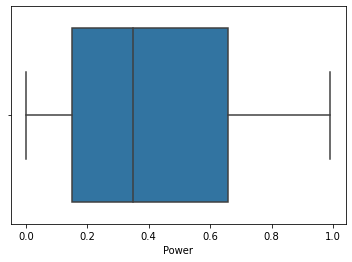

In [76]:
#for i in df.columns:
sns.boxplot(df['Power'])

In [89]:
df_box.columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m'],
      dtype='object')

In [88]:
df_box = df.drop(['Time','Power'],axis =1)


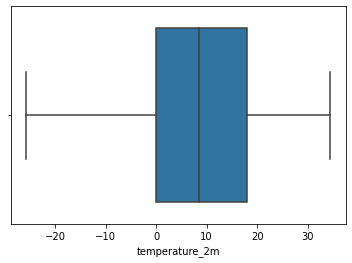

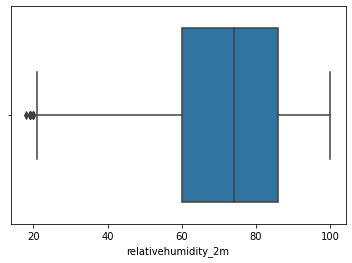

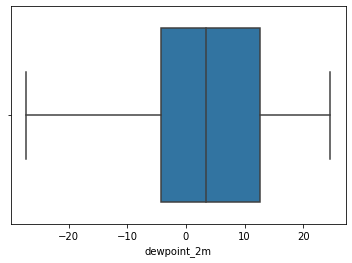

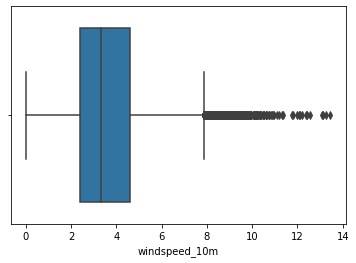

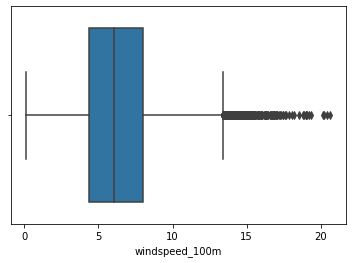

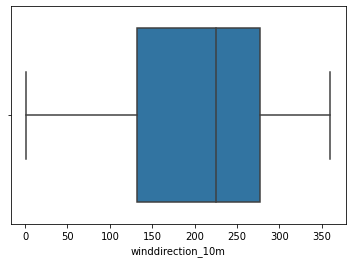

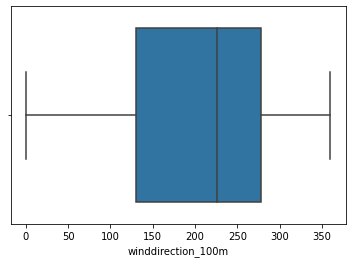

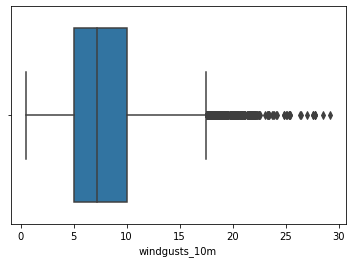

In [92]:
for i in df_box.columns :
   # if i == 'windgusts_10m':
    #    break
    sns.boxplot(df_box[i])
    plt.show()